In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#读取数据集
train_df = pd.read_csv('train.csv', low_memory=False)
store_df = pd.read_csv('store.csv')
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015/7/31,5263,555,1,1,0,1
1,2,5,2015/7/31,6064,625,1,1,0,1
2,3,5,2015/7/31,8314,821,1,1,0,1
3,4,5,2015/7/31,13995,1498,1,1,0,1
4,5,5,2015/7/31,4822,559,1,1,0,1


In [2]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
#数据集简要信息
train_df.info(),store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek    

(None, None)

In [4]:
#查看缺失情况
train_df.isnull().sum(),store_df.isnull().sum()

(Store            0
 DayOfWeek        0
 Date             0
 Sales            0
 Customers        0
 Open             0
 Promo            0
 StateHoliday     0
 SchoolHoliday    0
 dtype: int64,
 Store                          0
 StoreType                      0
 Assortment                     0
 CompetitionDistance            3
 CompetitionOpenSinceMonth    354
 CompetitionOpenSinceYear     354
 Promo2                         0
 Promo2SinceWeek              544
 Promo2SinceYear              544
 PromoInterval                544
 dtype: int64)

In [5]:
#缺失值填充
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median())
store_df['CompetitionOpenSinceMonth']=store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].median())
store_df['CompetitionOpenSinceYear']=store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].median())
store_df['Promo2SinceWeek']=store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear']=store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval']=store_df['PromoInterval'].fillna('None')

In [6]:
# 检查所有列是否有重复行
train_df.duplicated().sum()

0

In [7]:
store_df.duplicated().sum()

0


Bad key "text.kerning_factor" on line 4 in
D:\anaconda_environment\envs\py001\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


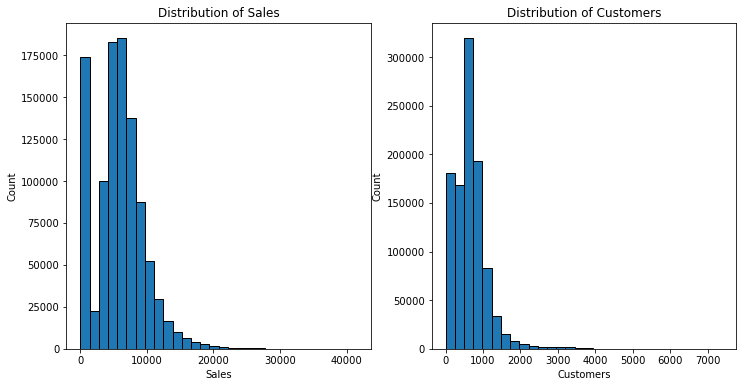

In [8]:
import matplotlib.pyplot as plt
#销量和顾客分布直方图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_df['Sales'], bins=30, edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.hist(train_df['Customers'], bins=30, edgecolor='black')
plt.title('Distribution of Customers')
plt.xlabel('Customers')
plt.ylabel('Count')
plt.tight_layout
plt.show()

In [9]:
#描述性统计信息，并将结果四舍五入到整数
train_df[['Sales','Customers']].describe().round(0)

,Sales,Customers
count,1017209.0,1017209.0
mean,5774.0,633.0
std,3850.0,464.0
min,0.0,0.0
25%,3727.0,405.0
50%,5744.0,609.0
75%,7856.0,837.0
max,41551.0,7388.0


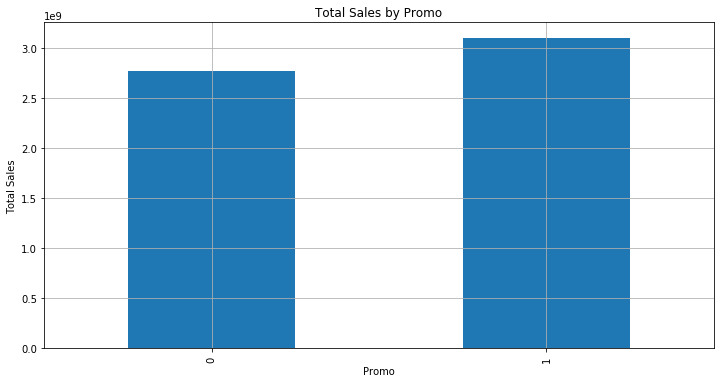

In [10]:
plt.figure(figsize=(12, 6))
# 是否有促销的Sales总量
pro_Sales = train_df.groupby('Promo')['Sales'].sum()
pro_Sales.plot(kind='bar')
plt.xlabel('Promo')
plt.ylabel('Total Sales')
plt.title('Total Sales by Promo')
plt.grid(True)

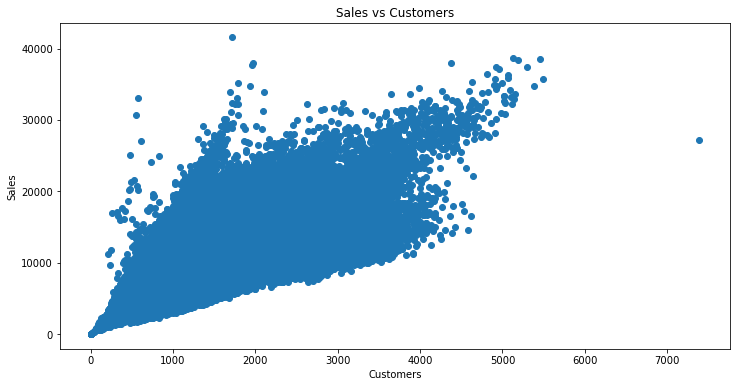

In [11]:
#顾客和销量之间的散点图（由图可知顾客越多销量越高）
plt.figure(figsize=(12, 6))
plt.scatter(train_df['Customers'], train_df['Sales'])
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Sales vs Customers')
plt.show()

In [12]:
#并合并train和store数据集
df = pd.merge(train_df, store_df, on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015/7/31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,1,4,2015/7/30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
2,1,3,2015/7/29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
3,1,2,2015/7/28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
4,1,1,2015/7/27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None


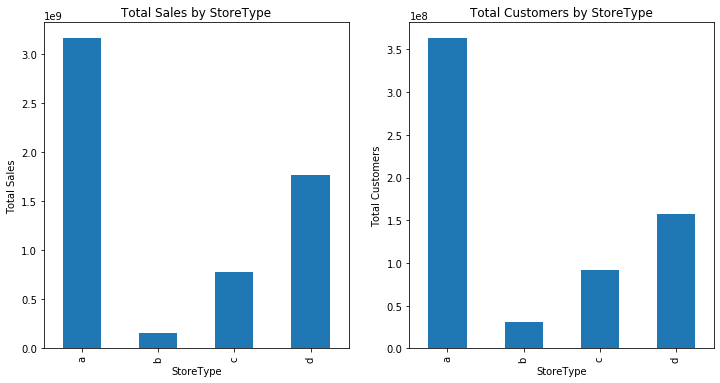

In [13]:
plt.figure(figsize=(12, 6))
#不同商店类型Sales总量直方图
plt.subplot(1, 2, 1)
StoreType_Sales = df.groupby('StoreType')['Sales'].sum()
StoreType_Sales.plot(kind='bar')
plt.xlabel('StoreType')
plt.ylabel('Total Sales')
plt.title('Total Sales by StoreType')

#不同商店类型Customers总量直方图
plt.subplot(1, 2, 2)
Customers_Sales = df.groupby('StoreType')['Customers'].sum()
Customers_Sales.plot(kind='bar')
plt.xlabel('StoreType')
plt.ylabel('Total Customers')
plt.title('Total Customers by StoreType')

plt.show()

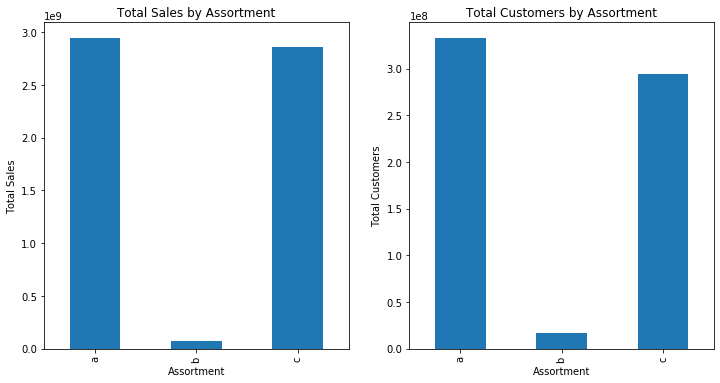

In [14]:
plt.figure(figsize=(12, 6))
#不同商品种类Sales总量直方图
plt.subplot(1, 2, 1)
Assortment_Sales = df.groupby('Assortment')['Sales'].sum()
Assortment_Sales.plot(kind='bar')
plt.xlabel('Assortment')
plt.ylabel('Total Sales')
plt.title('Total Sales by Assortment')

#不同商品种类Customers总量直方图
plt.subplot(1, 2, 2)
Assortment_Customers = df.groupby('Assortment')['Customers'].sum()
Assortment_Customers.plot(kind='bar')
plt.xlabel('Assortment')
plt.ylabel('Total Customers')
plt.title('Total Customers by Assortment')

plt.show()

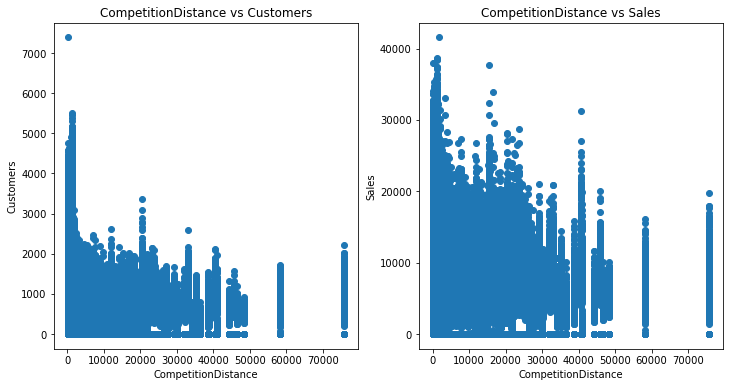

In [15]:
#竞争距离与顾客、销量之间的散点图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['CompetitionDistance'], df['Customers'])
plt.xlabel('CompetitionDistance')
plt.ylabel('Customers')
plt.title('CompetitionDistance vs Customers')
plt.subplot(1, 2, 2)
plt.scatter(df['CompetitionDistance'], df['Sales'])
plt.xlabel('CompetitionDistance')
plt.ylabel('Sales')
plt.title('CompetitionDistance vs Sales')
plt.show()

D:\anaconda_environment\envs\py001\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


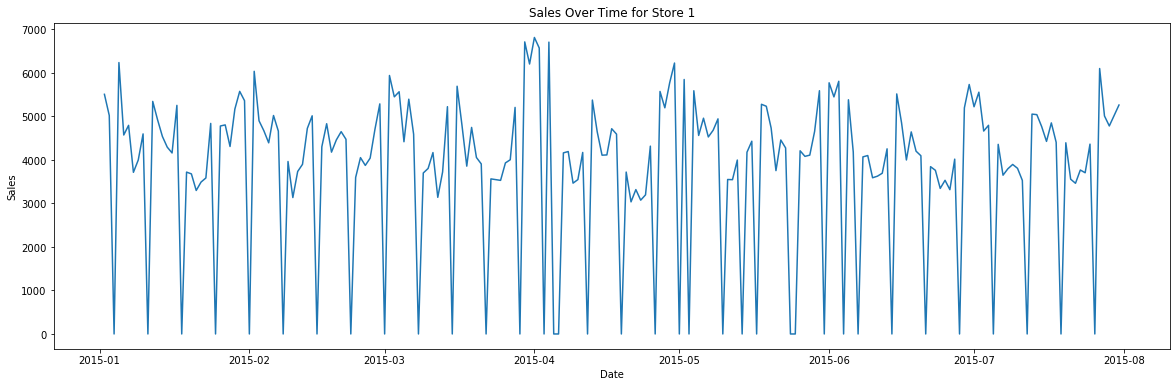

In [16]:
# 绘制折线图
plt.figure(figsize=(20, 6))
store1_df = df[df['Store'] == 1]
store1_df['Date'] = pd.to_datetime(store1_df['Date'])
#store_1_data.set_index('Date', inplace=True)
store1_df1 = store1_df[store1_df['Date'] > '2015-01-01']
plt.plot(store1_df1['Date'],store1_df1['Sales'], label='Sales')
plt.title('Sales Over Time for Store 1')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [17]:
#添加'Year'，'Month'，'Day'，'WeekOfYear'列
def split_date(df):
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df['Date'].dt.week

split_date(store1_df)
store1_df.head(5)

D:\anaconda_environment\envs\py001\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda_environment\envs\py001\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda_environment\envs\py001\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,None,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,None,2015,7,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,None,2015,7,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,None,2015,7,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,None,2015,7,27,31


In [18]:
store1_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear'],
      dtype='object')

Text(0.5, 1.0, 'Total Sales by Month')

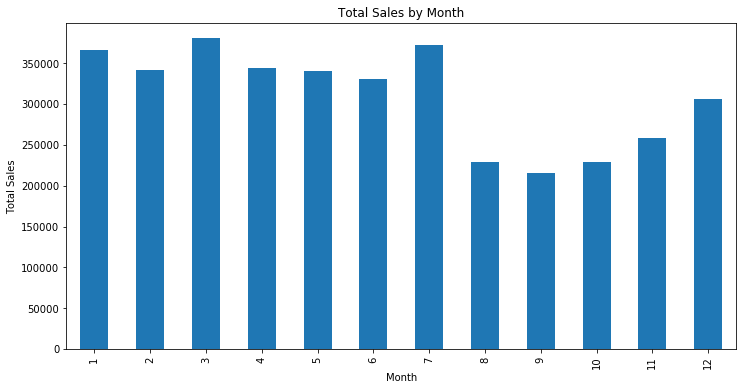

In [19]:
plt.figure(figsize=(12, 6))
#不同商品种类Sales总量直方图
Month_Sales = store1_df.groupby('Month')['Sales'].sum()
Month_Sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

Text(0.5, 1.0, 'Total Sales by DayOfWeek')

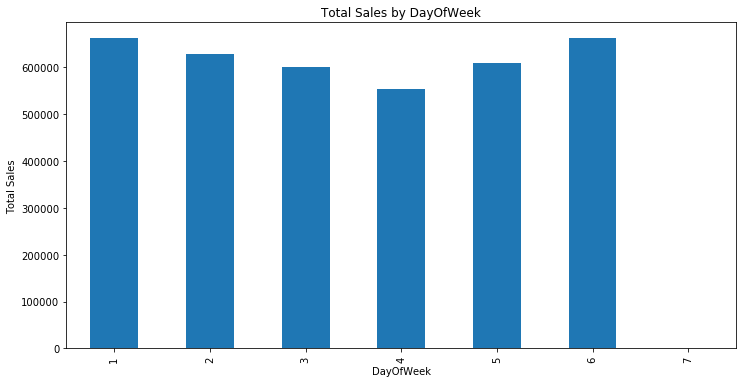

In [20]:
plt.figure(figsize=(12, 6))
#不同商品种类Sales总量直方图
Month_Sales = store1_df.groupby('DayOfWeek')['Sales'].sum()
Month_Sales.plot(kind='bar')
plt.xlabel('DayOfWeek')
plt.ylabel('Total Sales')
plt.title('Total Sales by DayOfWeek')

In [21]:
# 将 Date 列转换为日期时间类型
df['Date'] = pd.to_datetime(df['Date'])
# 将日期设为索引
# 按照 Date 和 Store 递增排序
new_df = df.sort_values(by=['Date', 'Store'])
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
941,1,2,2013-01-01,0,0,0,0,a,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1883,2,2,2013-01-01,0,0,0,0,a,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2825,3,2,2013-01-01,0,0,0,0,a,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3767,4,2,2013-01-01,0,0,0,0,a,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,None
4709,5,2,2013-01-01,0,0,0,0,a,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012499,1111,5,2015-07-31,5723,422,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1013441,1112,5,2015-07-31,9626,767,1,1,0,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,None
1014383,1113,5,2015-07-31,7289,720,1,1,0,1,a,c,9260.0,8.0,2010.0,0,0.0,0.0,None
1015325,1114,5,2015-07-31,27508,3745,1,1,0,1,a,c,870.0,8.0,2010.0,0,0.0,0.0,None


In [22]:
#添加'Year'，'Month'，'Day'，'WeekOfYear'列
def split_date(df):
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df['Date'].dt.week
    #df['WeekOfYear'] = df.Date.dt.isocalendar().week

split_date(new_df)
new_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
941,1,2,2013-01-01,0,0,0,0,a,1,c,...,9.0,2008.0,0,0.0,0.0,None,2013,1,1,1
1883,2,2,2013-01-01,0,0,0,0,a,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2013,1,1,1
2825,3,2,2013-01-01,0,0,0,0,a,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2013,1,1,1
3767,4,2,2013-01-01,0,0,0,0,a,1,c,...,9.0,2009.0,0,0.0,0.0,None,2013,1,1,1
4709,5,2,2013-01-01,0,0,0,0,a,1,a,...,4.0,2015.0,0,0.0,0.0,None,2013,1,1,1


In [23]:
#筛选Open为1的行，并创建副本
new_df = new_df[new_df.Open == 1].copy()  

def comp_months(df):
    #计算竞争经历的月数
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth) 
    #小于0则用0填充
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

comp_months(new_df)

new_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
77677,85,2,2013-01-01,4220,619,1,0,a,1,b,...,2011.0,0,0.0,0.0,None,2013,1,1,1,15.0
235513,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,2010.0,0,0.0,0.0,None,2013,1,1,1,29.0
238339,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,2013.0,0,0.0,0.0,None,2013,1,1,1,0.0
249459,274,2,2013-01-01,3102,729,1,0,a,1,b,...,2010.0,1,10.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,29.0
305081,335,2,2013-01-01,2401,482,1,0,a,1,b,...,2010.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,29.0


In [24]:
def check_promo_month(row):
    month2str = {
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sept',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    }
    try:
        #判断是否处于促销月份
        months = (df['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row[month]] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    #计算距离"Promo2" 活动开放的时间，并添加'Promo2Open'列
    df['Promo2Open'] = 12*(df.Year-df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    #小于0和负值以0填充
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

promo_cols(new_df)

new_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
77677,85,2,2013-01-01,4220,619,1,0,a,1,b,...,0.0,0.0,None,2013,1,1,1,15.0,0.0,0
235513,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,0.0,0.0,None,2013,1,1,1,29.0,0.0,0
238339,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,0.0,0.0,None,2013,1,1,1,0.0,0.0,0
249459,274,2,2013-01-01,3102,729,1,0,a,1,b,...,10.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,29.0,0.0,0
305081,335,2,2013-01-01,2401,482,1,0,a,1,b,...,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,29.0,0.0,0
321485,353,2,2013-01-01,3139,820,1,0,a,1,b,...,14.0,2013.0,"Feb,May,Aug,Nov",2013,1,1,1,29.0,0.0,0
386137,423,2,2013-01-01,9643,1751,1,0,a,1,b,...,0.0,0.0,None,2013,1,1,1,0.0,0.0,0
450995,494,2,2013-01-01,3113,527,1,0,a,1,b,...,0.0,0.0,None,2013,1,1,1,19.0,0.0,0
467215,512,2,2013-01-01,2646,625,1,0,a,1,b,...,5.0,2013.0,"Mar,Jun,Sept,Dec",2013,1,1,1,29.0,0.0,0
483619,530,2,2013-01-01,2907,532,1,0,a,1,a,...,0.0,0.0,None,2013,1,1,1,29.0,0.0,0


In [25]:
from sklearn.preprocessing import LabelEncoder
#对类别特征进行标签编码
label_encoder = LabelEncoder()
new_df['StoreType'] = label_encoder.fit_transform(new_df['StoreType'])
new_df['Assortment'] = label_encoder.fit_transform(new_df['Assortment'])
new_df['StateHoliday'] = label_encoder.fit_transform(new_df['StateHoliday'])
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
77677,85,2,2013-01-01,4220,619,1,0,1,1,1,...,0.0,0.0,None,2013,1,1,1,15.0,0.0,0
235513,259,2,2013-01-01,6851,1444,1,0,1,1,1,...,0.0,0.0,None,2013,1,1,1,29.0,0.0,0
238339,262,2,2013-01-01,17267,2875,1,0,1,1,1,...,0.0,0.0,None,2013,1,1,1,0.0,0.0,0
249459,274,2,2013-01-01,3102,729,1,0,1,1,1,...,10.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,29.0,0.0,0
305081,335,2,2013-01-01,2401,482,1,0,1,1,1,...,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,29.0,0.0,0


In [26]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#特征列
features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']

X = new_df[features]
y = new_df['Sales']

# 按顺序划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [27]:
X_train.shape,y_train.shape,X_test.shape

((675513, 17), (675513,), (168879, 17))

In [28]:
# 构建XGBoost模型
#n_jobs=-1：表示使用计算机的所有核心进行并行计算。
#random_state=36：设置随机种子，保证每次运行结果的一致性。
#n_estimators=1000：表示要构建的树的数量（即弱学习器的数量）。
#learning_rate=0.2：学习率，控制每个树对最终模型的贡献。
#max_depth=10：决策树的最大深度，控制树的复杂度，避免过拟合。
#subsample=0.9：每棵树使用的训练样本的比例，用于控制随机抽样的比例，避免过拟合。
#colsample_bytree=0.7：每棵树使用的特征的比例，用于控制特征采样的比例，避免过拟合。

model = xgb.XGBRegressor(n_jobs=-1, random_state=36, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=36,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
# 销售额预测和评估
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared=False)
print("Sales MSE:", mse)


Sales MSE: 1151.0391245524027


In [30]:
y_pred

array([ 5989.2925,  8289.167 ,  7921.2104, ...,  7215.9243, 24543.45  ,
        9404.995 ], dtype=float32)

In [32]:
ye = y_test.values
# 取数组的后 2000 条数据
ye_test = ye[-300:]
ye_pred = y_pred[-300:]
# 打印数组的形状
ye_test

array([ 8186,  7067, 23093,  7049,  6554, 14985, 11232,  9974,  7924,
        9252,  6003, 11768, 17099,  8019,  7453,  8415, 15152,  9199,
        6918,  8150,  7948,  7217,  5481,  9798,  5099,  7818,  3768,
       23996, 12775,  6444,  5151, 12705, 10011, 10527, 10829,  8380,
        6305,  5722, 13046,  5653, 10423,  9416,  9211,  5540,  8854,
        8977,  5338, 11935, 13290,  6690,  9709,  9827,  6462, 11441,
        7768,  7064,  8478,  9747,  3871,  6384,  6555,  8646, 11254,
        6000, 10670,  7396,  7416,  5850,  7661,  6754,  6857,  8902,
       12206,  6312,  8467, 11916, 10054,  7179, 11866, 12182,  8763,
        4691,  8833,  5952,  7358,  8220,  4897, 13911,  7901,  8157,
       15131,  8485,  5618, 16140,  8547, 12944,  6864, 11718, 11972,
        9843,  6157,  9099,  6966,  8280,  7788,  9180,  8447,  5812,
        4513,  9287, 10359,  8625, 12541,  8331,  9512,  5943, 10845,
        9769,  9507,  8941,  6717,  8508, 12268,  7546, 10323,  6526,
        8518,  8183,

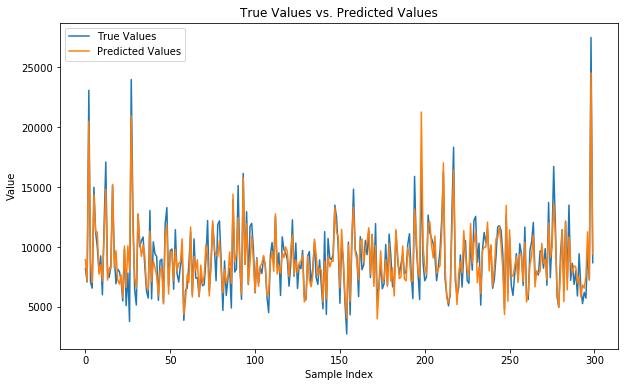

In [33]:

# 真实值和预测值对比
plt.figure(figsize=(10, 6))

# 绘制真实值的折线
plt.plot(ye_test, label='True Values')

# 绘制预测值的折线
plt.plot(ye_pred, label='Predicted Values')

# 添加标签和标题
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True Values vs. Predicted Values')

# 添加图例
plt.legend()

# 显示图形
plt.show()